### Setup

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from wearsed.training.metric import get_ahis, combine_fold_results, get_ahis_single_recording
from wearsed.training.kfold.load_kfold import get_fold
from wearsed.dataset.Recording import Recording

In [2]:
def get_ahi_severity_class(ahi):
    if ahi < 5:   # Normal
        return 0
    if ahi < 15:  # Mild
        return 1
    if ahi < 30:  # Moderate
        return 2
    return 3      # Severe

def get_ahi_severity_class_NBL(ahi, window=2):
    if ahi < 5 and ahi > 5 - window:
        return 1  # Mild
    if ahi > 5 and ahi < 5 + window:
        return 0  # Normal
    if ahi < 15 and ahi > 15 - window:
        return 2  # Moderate
    if ahi > 15 and ahi < 15 + window:
        return 1  # Mild
    if ahi < 30 and ahi > 30 - window:
        return 3  # Severe
    if ahi > 30 and ahi < 30 + window:
        return 2  # Moderate
    return -1     # No NBL

In [64]:
run, folds, epoch = 'attention_gates_bottleneck', [0, 1, 2, 3], 29
thr = 0.4

y_pred, y_true = combine_fold_results(run, folds, epoch)
ahis_pred, ahis_true = get_ahis(y_pred, y_true, thr)

In [33]:
train_set, test_set = get_fold('fold-4-somnolyzer', 0, path='../wearsed/training/kfold/')

In [34]:
test_set[:10]

[6783, 5148, 4157, 856, 5224, 4928, 4284, 5396, 2735, 5292]

In [48]:
rec = Recording(5224, events_as_list=True)

<Axes: >

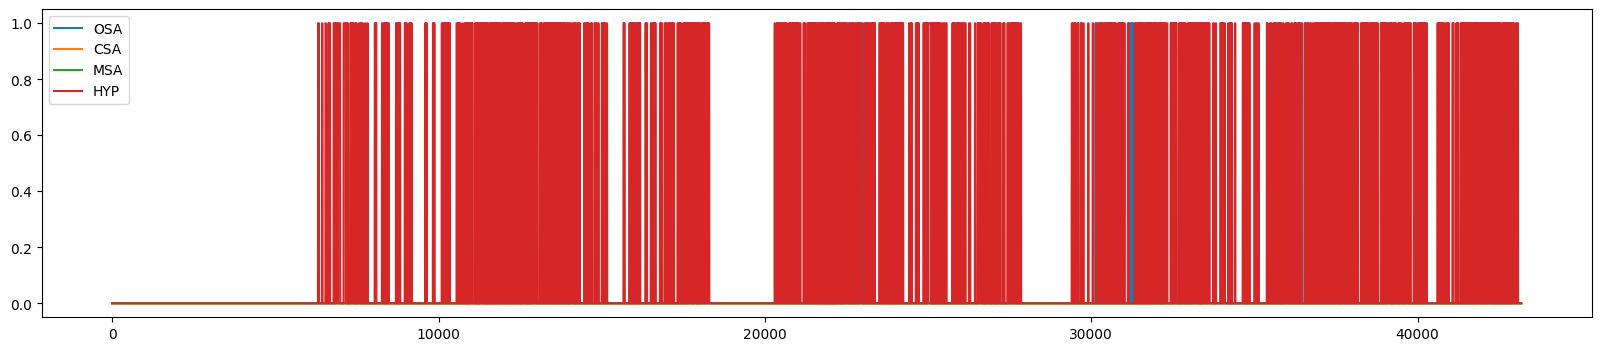

In [45]:
rec.event_df[['OSA', 'CSA', 'MSA', 'HYP']].plot(figsize=(20, 4))

In [65]:
rec_y_true, rec_y_pred = y_true[139444:181444], y_pred[139444:181444]
rec_y_true, rec_y_pred = rec_y_true.reset_index()['targets'], rec_y_pred.reset_index()['predictions']

<Axes: >

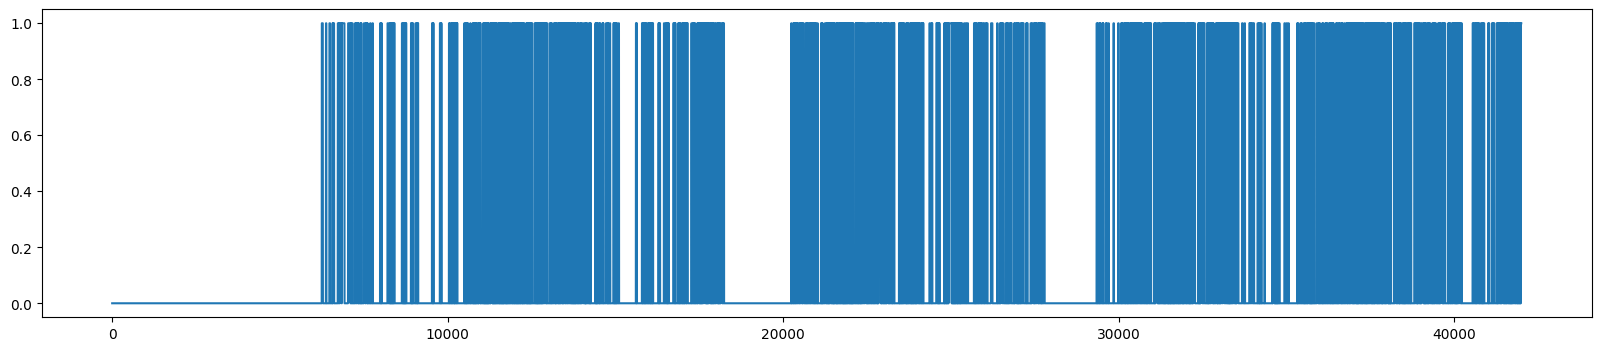

In [66]:
rec_y_true.plot(figsize=(20, 4))

<Axes: >

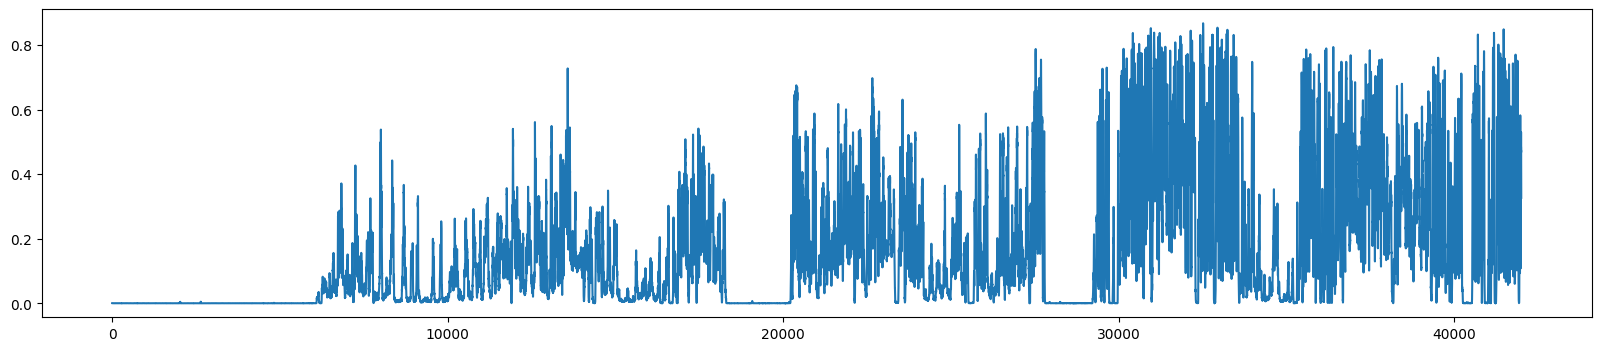

In [67]:
rec_y_pred.plot(figsize=(20, 4))

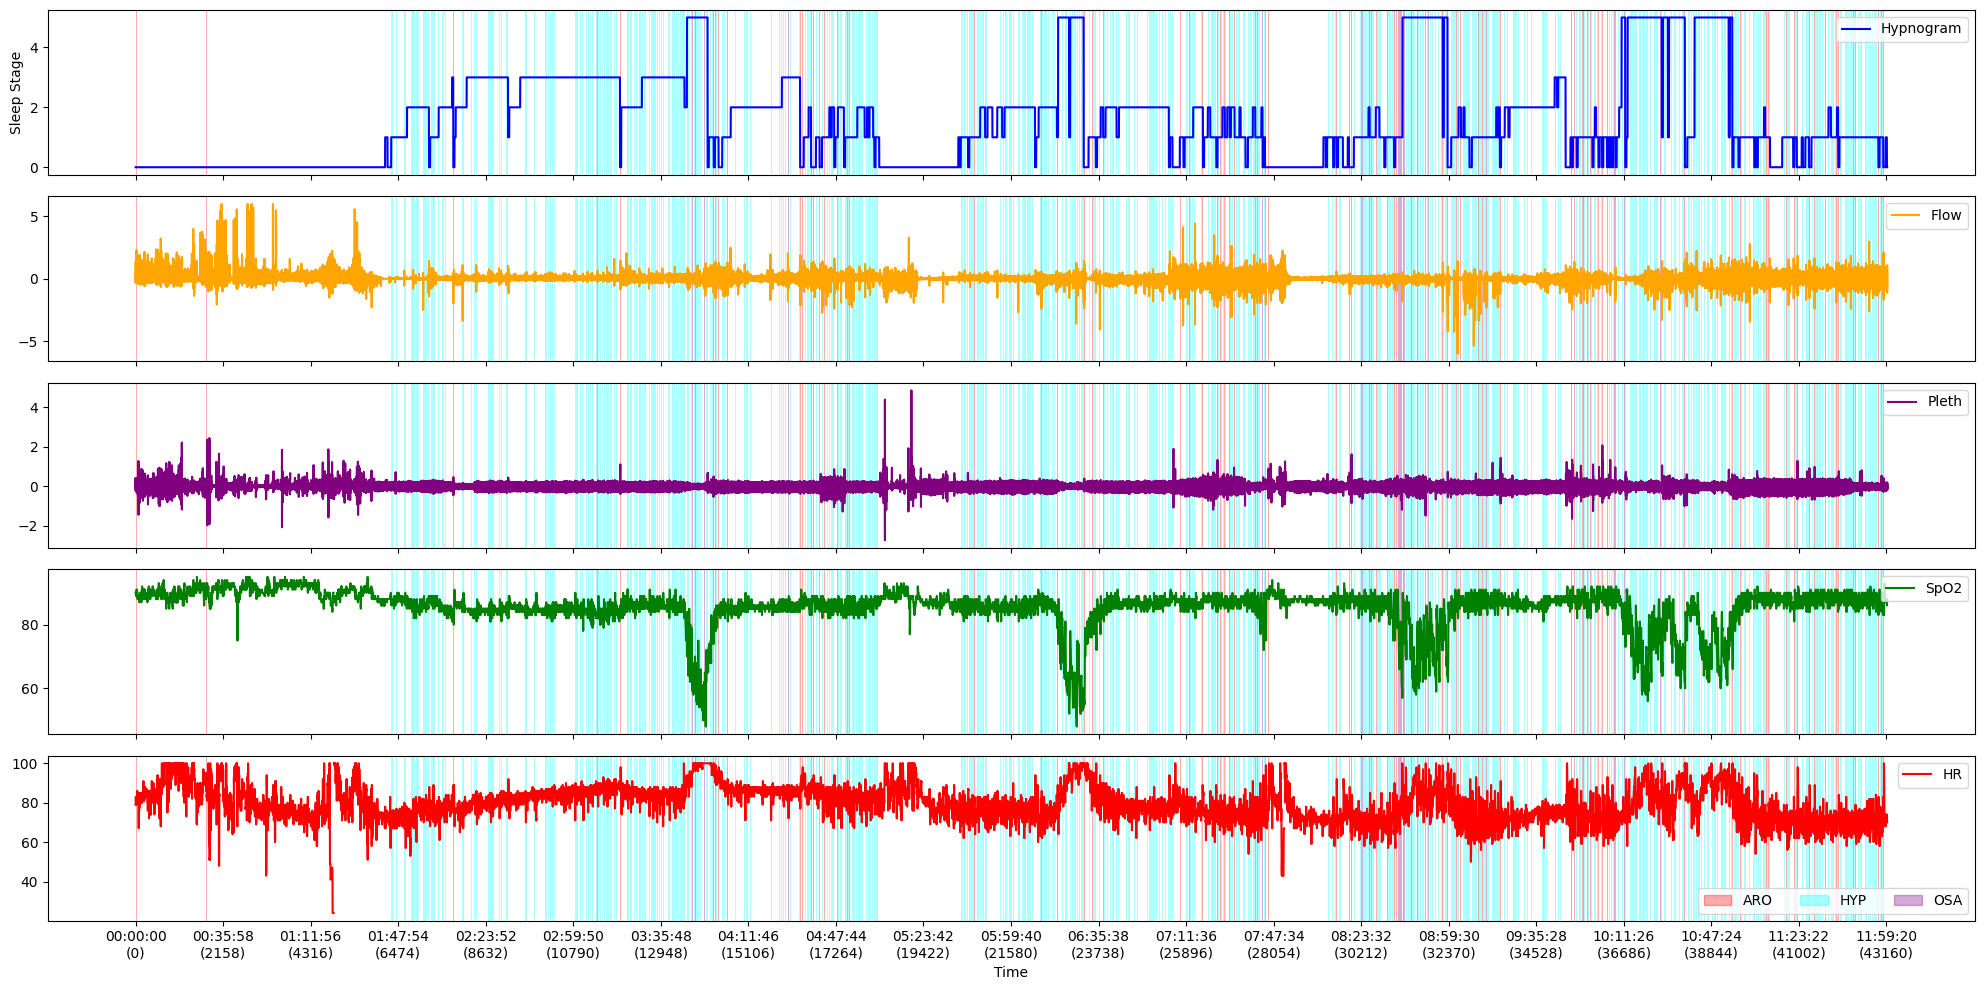

In [49]:
rec.look_at()

In [69]:
get_ahis_single_recording(rec_y_pred, rec_y_true, thr)

(33.94285714285714, 69.85714285714286)

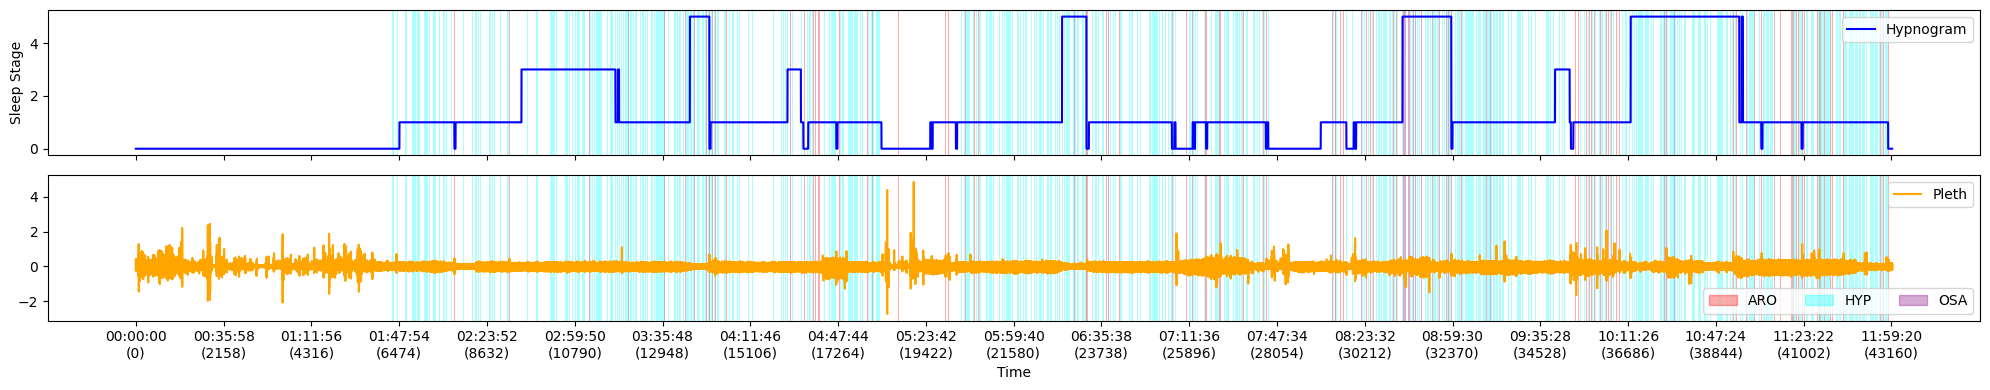

In [71]:
Recording(5224, signals_to_read=['Pleth'], events_as_list=True, use_predicted_hypnogram=True).look_at()

In [42]:
list(y_true[y_true == -999].index)[:10]

[38640, 75601, 109202, 139443, 181444, 213365, 253686, 288967, 320888, 354489]

In [28]:
list(zip(ahis_true, ahis_pred))[:10]

[(8.757990631227516, 6.8945883692642145),
 (30.19480519480519, 22.69480519480519),
 (17.25, 13.5),
 (6.904761904761904, 4.642857142857142),
 (69.85714285714286, 33.94285714285714),
 (20.18796992481203, 21.654135338345863),
 (16.339285714285715, 14.821428571428573),
 (7.857142857142857, 0.4081632653061224),
 (24.473684210526315, 27.857142857142854),
 (1.607142857142857, 1.8214285714285714)]

In [26]:
[(a, b, c,) for a, b, c in list(zip(range(len(ahis_true)), ahis_true, ahis_pred)) if b > 65 and b < 75]

[(4, 69.85714285714286, 33.94285714285714),
 (488, 71.89285714285714, 70.39285714285714),
 (1191, 73.46938775510203, 53.57142857142857),
 (1395, 70.86734693877551, 67.5)]

### Plots

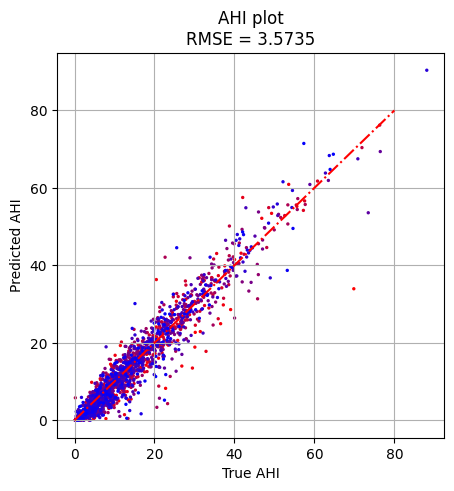

In [18]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(ahis_true, ahis_pred, s=2, c=[(1-i/len(ahis_true), 0, i/len(ahis_true)) for i in range(len(ahis_true))])
ax.plot([0, 80], [0, 80], 'r-.')
ax.set_title(f'AHI plot\nRMSE = {np.sqrt(((np.array(ahis_pred) - np.array(ahis_true)) ** 2).mean()):.4f}')
ax.set_xlabel('True AHI')
ax.set_ylabel('Predicted AHI')
ax.grid()

plt.show()